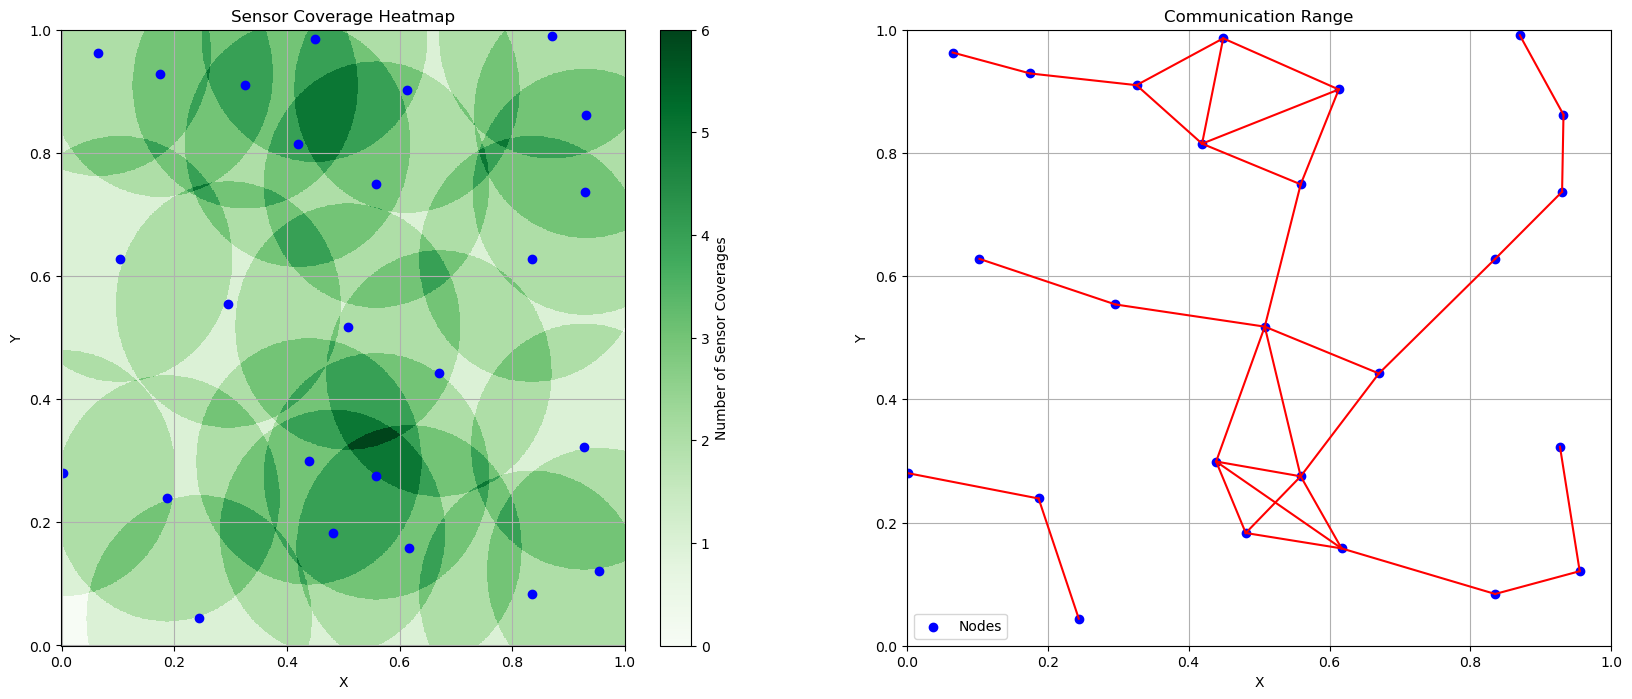

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Read node coordinates from file
with open("nodes.txt", "r") as file:
    lines = file.readlines()

# Parse coordinates
coordinates = []
for line in lines:
    x, y = map(float, line.strip().split(','))
    coordinates.append([x, y])
coordinates = np.array(coordinates)

# Environment size
L = 1.0

# Communications radius
Rc = 0.25 * L

# Sensing radius
Rs = 0.2 * L

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the nodes for communication range
axs[1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i+1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[1].plot([coordinates[i, 0], coordinates[j, 0]], 
                        [coordinates[i, 1], coordinates[j, 1]], 
                        color='red')

axs[1].set_xlim(0.0, 1.0)
axs[1].set_ylim(0.0, 1.0)
axs[1].set_title('Communication Range')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()
axs[1].grid(True)

# Create a grid
grid_size = 1000
x_grid = np.linspace(0, L, grid_size)
y_grid = np.linspace(0, L, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Calculate sensor coverage
sensor_coverage = np.zeros_like(X, dtype=int)
for node in coordinates:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_coverage += (dist_to_node <= Rs)

# Plot heatmap
heatmap = axs[0].pcolormesh(X, Y, sensor_coverage, cmap='Greens', shading='auto')
axs[0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[0].set_title('Sensor Coverage Heatmap')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
#axs[0].legend()
axs[0].grid(True)

fig.colorbar(heatmap, ax=axs[0], label='Number of Sensor Coverages')

plt.show()

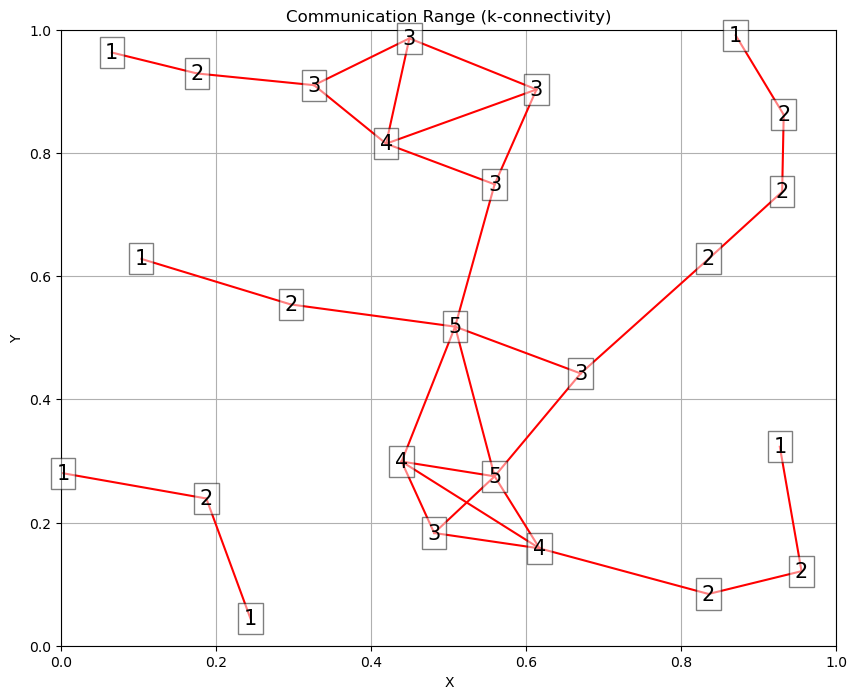

In [16]:
# Variable for k-connectivity
k_connectivity = np.zeros(len(coordinates), dtype=int)

# Create figure and subplot
plt.figure(figsize=(10, 8))

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            plt.plot([coordinates[i, 0], coordinates[j, 0]],
                     [coordinates[i, 1], coordinates[j, 1]],
                     color='red', alpha=1.0)  # Make edges transparent

# Counting k-connectivity
for i in range(len(coordinates)):
    count = 0
    for j in range(len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc and dist != 0 :
            count += 1
    k_connectivity[i] = count

# Plotting the nodes and communication range
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes', alpha=0.0, s=50)

# Displaying k-connectivity information
for i, (x, y) in enumerate(coordinates):
    plt.text(x, y, str(k_connectivity[i]), fontsize=15, ha='center', va='center', zorder=5, bbox=dict(facecolor='white', alpha=0.5))

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.title('Communication Range (k-connectivity)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.show()

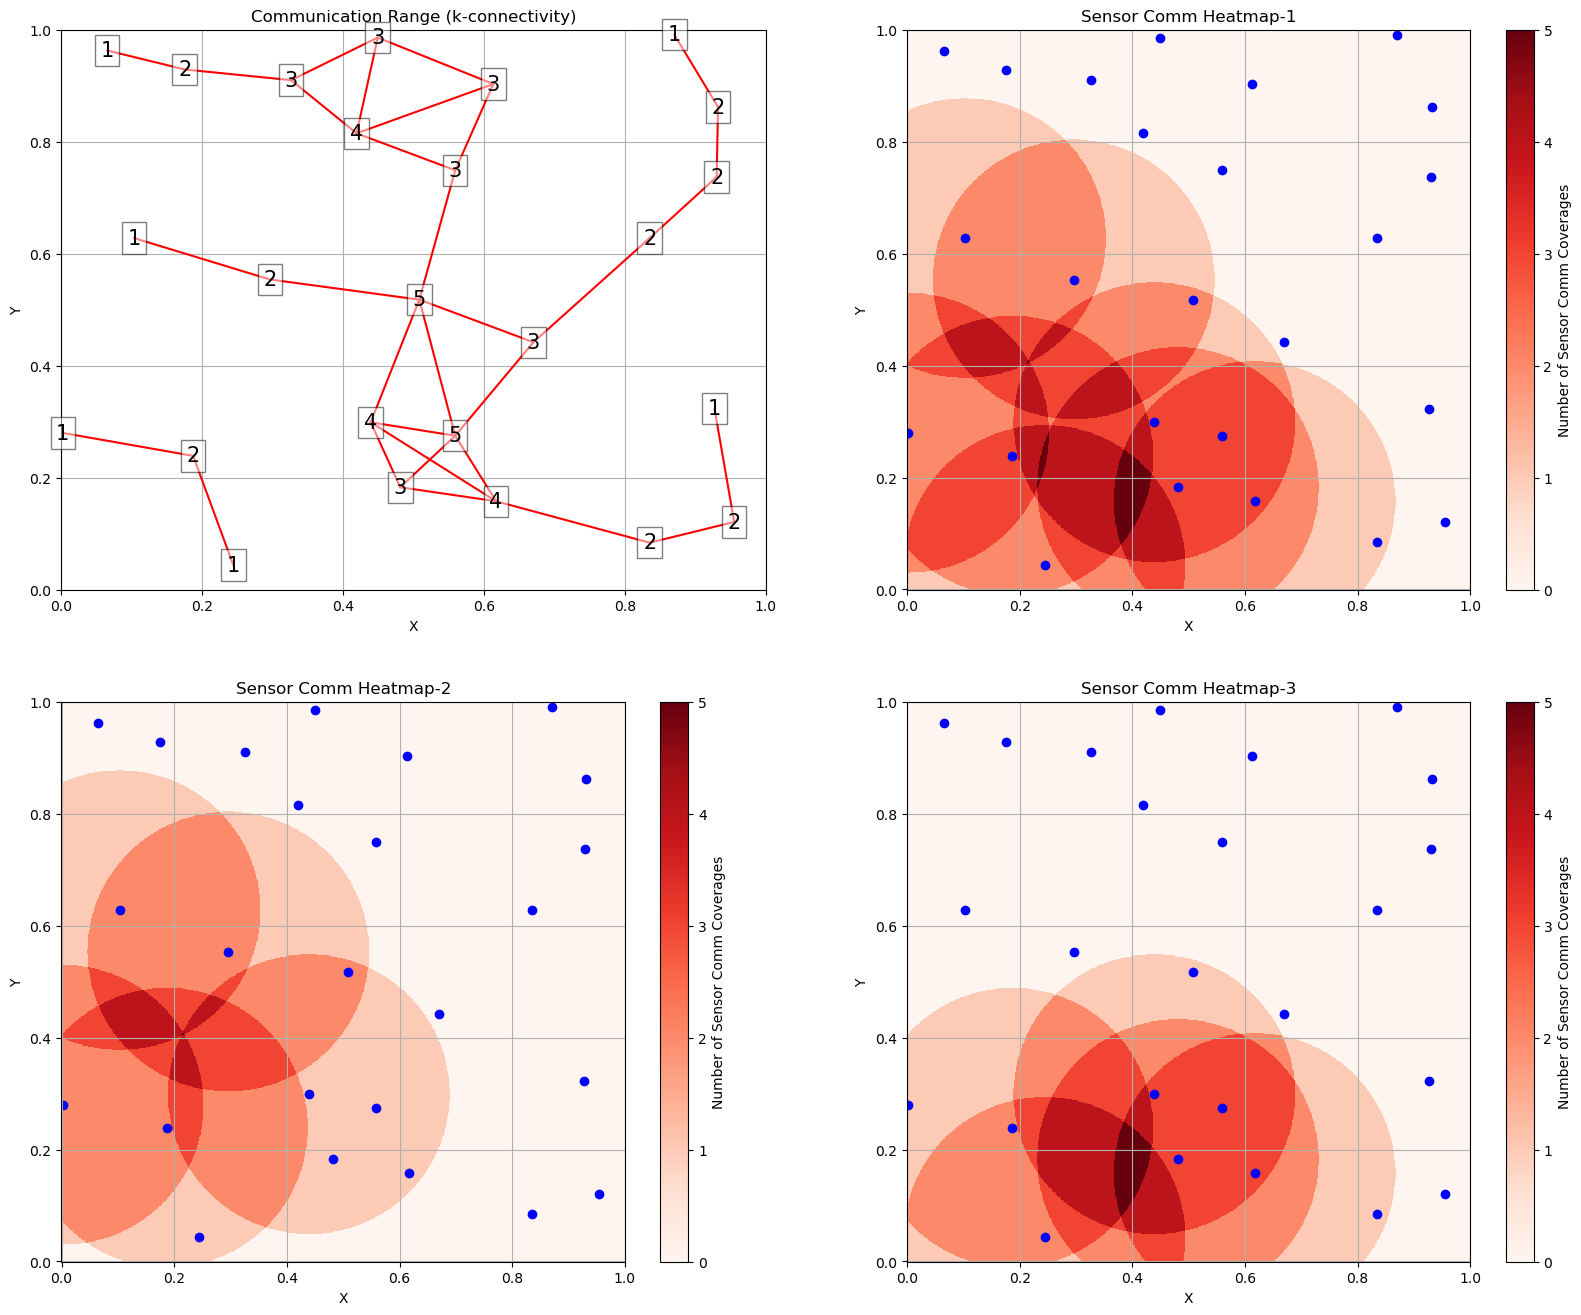

In [17]:
# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Variable for k-connectivity
k_connectivity = np.zeros(len(coordinates), dtype=int)

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[0, 0].plot([coordinates[i, 0], coordinates[j, 0]],
                     [coordinates[i, 1], coordinates[j, 1]],
                     color='red', alpha=1.0)  # Make edges transparent

# Counting k-connectivity
for i in range(len(coordinates)):
    count = 0
    for j in range(len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc and dist != 0 :
            count += 1
    k_connectivity[i] = count

# Plotting the nodes and communication range
axs[0, 0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes', alpha=0.0, s=50)

axs[0, 0].set_title('Communication Range (k-connectivity)')
axs[0, 0].set_xlim(0.0, 1.0)
axs[0, 0].set_ylim(0.0, 1.0)
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')
axs[0, 0].grid(True)

# Displaying k-connectivity information
for i, (x, y) in enumerate(coordinates):
    axs[0, 0].text(x, y, str(k_connectivity[i]), fontsize=15, ha='center', va='center', zorder=5, bbox=dict(facecolor='white', alpha=0.5))


# Coordinates of the nodes
nodes_1 = np.array([(0.244, 0.044), (0.187, 0.239), (0.002, 0.28), (0.439, 0.299), 
                  (0.617, 0.158), (0.481, 0.183), (0.103, 0.628), (0.296, 0.554)])
# Create a grid
grid_size = 1000
x_grid = np.linspace(0, L, grid_size)
y_grid = np.linspace(0, L, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Calculate sensor Communication Range
sensor_comm = np.zeros_like(X, dtype=int)
for node in nodes_1:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_comm += (dist_to_node <= Rc)

# Plot heatmap
heatmap = axs[0, 1].pcolormesh(X, Y, sensor_comm, cmap='Reds', shading='auto')
axs[0, 1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[0, 1].set_title('Sensor Comm Heatmap-1')
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')
axs[0, 1].grid(True)

fig.colorbar(heatmap, ax=axs[0, 1], label='Number of Sensor Comm Coverages')

# Coordinates of the nodes
nodes_2 = np.array([(0.187, 0.239), (0.002, 0.28), (0.439, 0.299), 
                  (0.103, 0.628), (0.296, 0.554)])

# Calculate sensor Communication Range
sensor_comm = np.zeros_like(X, dtype=int)
for node in nodes_2:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_comm += (dist_to_node <= Rc)

# Plot heatmap
heatmap = axs[1, 0].pcolormesh(X, Y, sensor_comm, cmap='Reds', shading='auto')
axs[1, 0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[1, 0].set_title('Sensor Comm Heatmap-2')
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')
axs[1, 0].grid(True)

fig.colorbar(heatmap, ax=axs[1, 0], label='Number of Sensor Comm Coverages')

# Coordinates of the nodes
nodes_3 = np.array([(0.244, 0.044), (0.187, 0.239), (0.439, 0.299), 
                  (0.617, 0.158), (0.481, 0.183)])

# Calculate sensor Communication Range
sensor_comm = np.zeros_like(X, dtype=int)
for node in nodes_3:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_comm += (dist_to_node <= Rc)

# Plot heatmap
heatmap = axs[1, 1].pcolormesh(X, Y, sensor_comm, cmap='Reds', shading='auto')
axs[1, 1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[1, 1].set_title('Sensor Comm Heatmap-3')
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('Y')
axs[1, 1].grid(True)

fig.colorbar(heatmap, ax=axs[1, 1], label='Number of Sensor Comm Coverages')

plt.show()

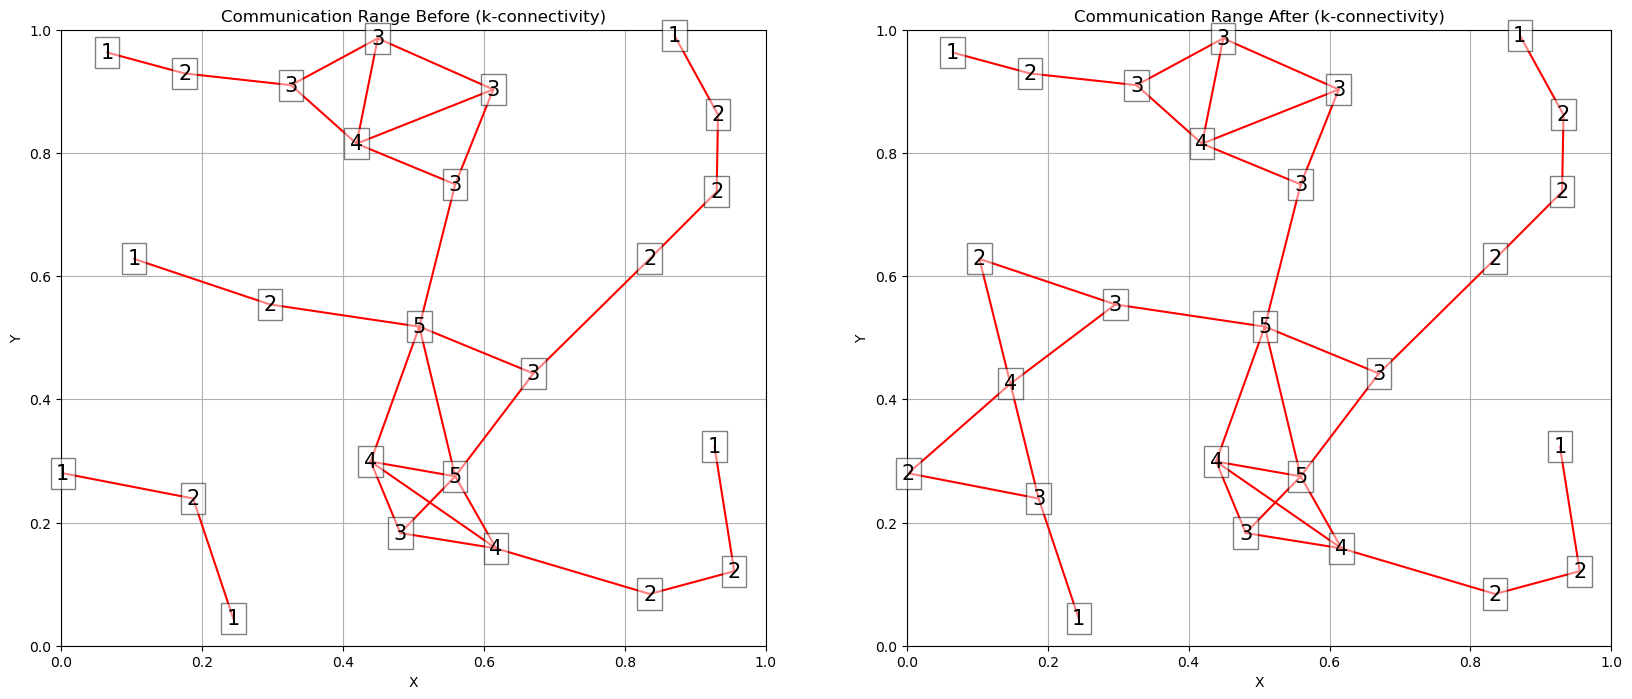

In [18]:
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Variable for k-connectivity
k_connectivity = np.zeros(len(coordinates), dtype=int)

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[0].plot([coordinates[i, 0], coordinates[j, 0]],
                     [coordinates[i, 1], coordinates[j, 1]],
                     color='red', alpha=1.0)  # Make edges transparent

# Counting k-connectivity
for i in range(len(coordinates)):
    count = 0
    for j in range(len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc and dist != 0 :
            count += 1
    k_connectivity[i] = count

# Plotting the nodes and communication range
axs[0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes', alpha=0.0, s=50)

axs[0].set_title('Communication Range Before (k-connectivity)')
axs[0].set_xlim(0.0, 1.0)
axs[0].set_ylim(0.0, 1.0)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].grid(True)

# Displaying k-connectivity information
for i, (x, y) in enumerate(coordinates):
    axs[0].text(x, y, str(k_connectivity[i]), fontsize=15, ha='center', va='center', zorder=5, bbox=dict(facecolor='white', alpha=0.5))



# Add the new point
new_point = np.array([0.147, 0.42525])
coordinates = np.vstack([coordinates, new_point])

# Variable for k-connectivity
k_connectivity = np.zeros(len(coordinates), dtype=int)

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[1].plot([coordinates[i, 0], coordinates[j, 0]],
                     [coordinates[i, 1], coordinates[j, 1]],
                     color='red', alpha=1.0)  # Make edges transparent

# Counting k-connectivity
for i in range(len(coordinates)):
    count = 0
    for j in range(len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc and dist != 0 :
            count += 1
    k_connectivity[i] = count

# Plotting the nodes and communication range
axs[1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes', alpha=0.0, s=50)

axs[1].set_title('Communication Range After (k-connectivity)')
axs[1].set_xlim(0.0, 1.0)
axs[1].set_ylim(0.0, 1.0)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].grid(True)

# Displaying k-connectivity information
for i, (x, y) in enumerate(coordinates):
    axs[1].text(x, y, str(k_connectivity[i]), fontsize=15, ha='center', va='center', zorder=5, bbox=dict(facecolor='white', alpha=0.5))


plt.show()

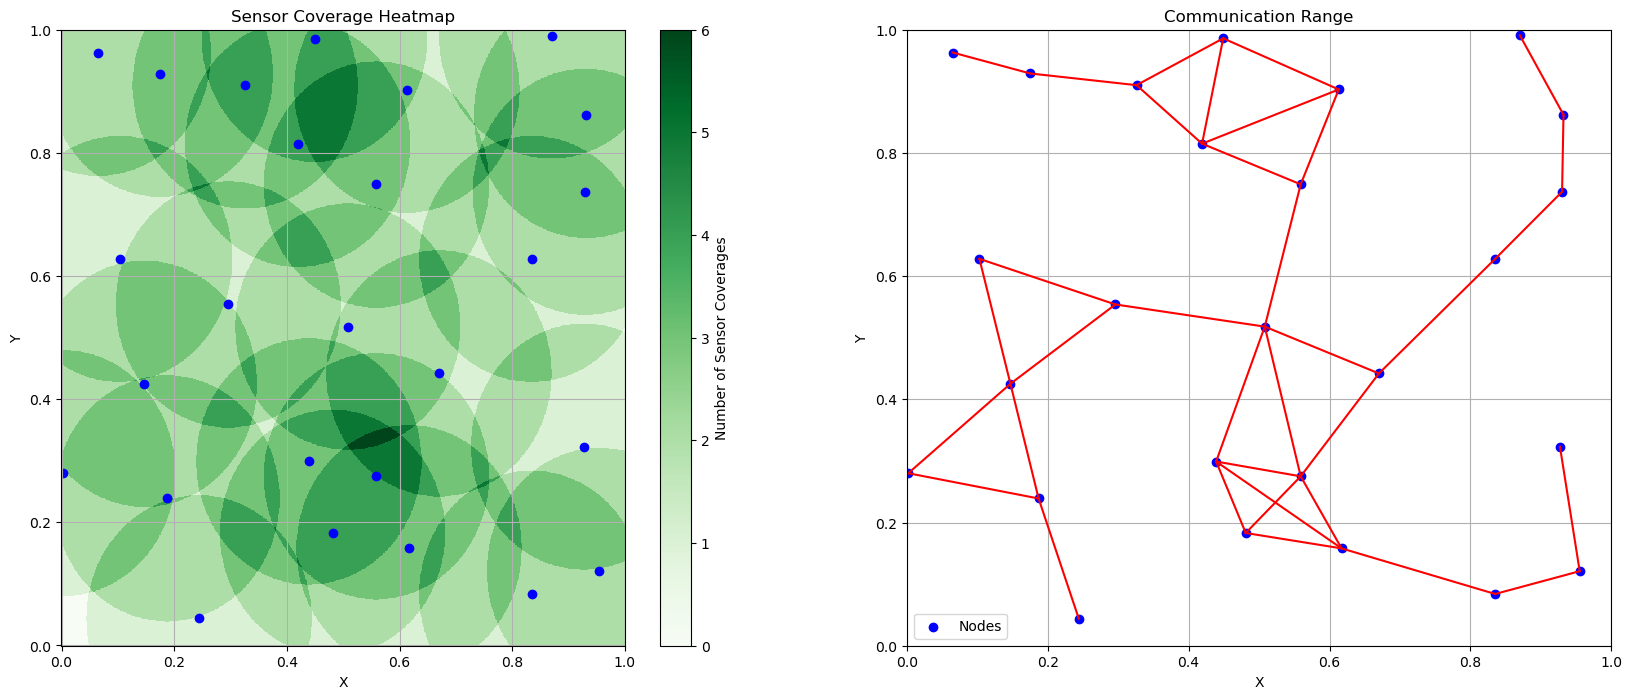

In [19]:
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the nodes for communication range
axs[1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i+1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[1].plot([coordinates[i, 0], coordinates[j, 0]], 
                        [coordinates[i, 1], coordinates[j, 1]], 
                        color='red')

axs[1].set_xlim(0.0, 1.0)
axs[1].set_ylim(0.0, 1.0)
axs[1].set_title('Communication Range')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()
axs[1].grid(True)

# Create a grid
grid_size = 1000
x_grid = np.linspace(0, L, grid_size)
y_grid = np.linspace(0, L, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Calculate sensor coverage
sensor_coverage = np.zeros_like(X, dtype=int)
for node in coordinates:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_coverage += (dist_to_node <= Rs)

# Plot heatmap
heatmap = axs[0].pcolormesh(X, Y, sensor_coverage, cmap='Greens', shading='auto')
axs[0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[0].set_title('Sensor Coverage Heatmap')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
#axs[0].legend()
axs[0].grid(True)

fig.colorbar(heatmap, ax=axs[0], label='Number of Sensor Coverages')

plt.show()

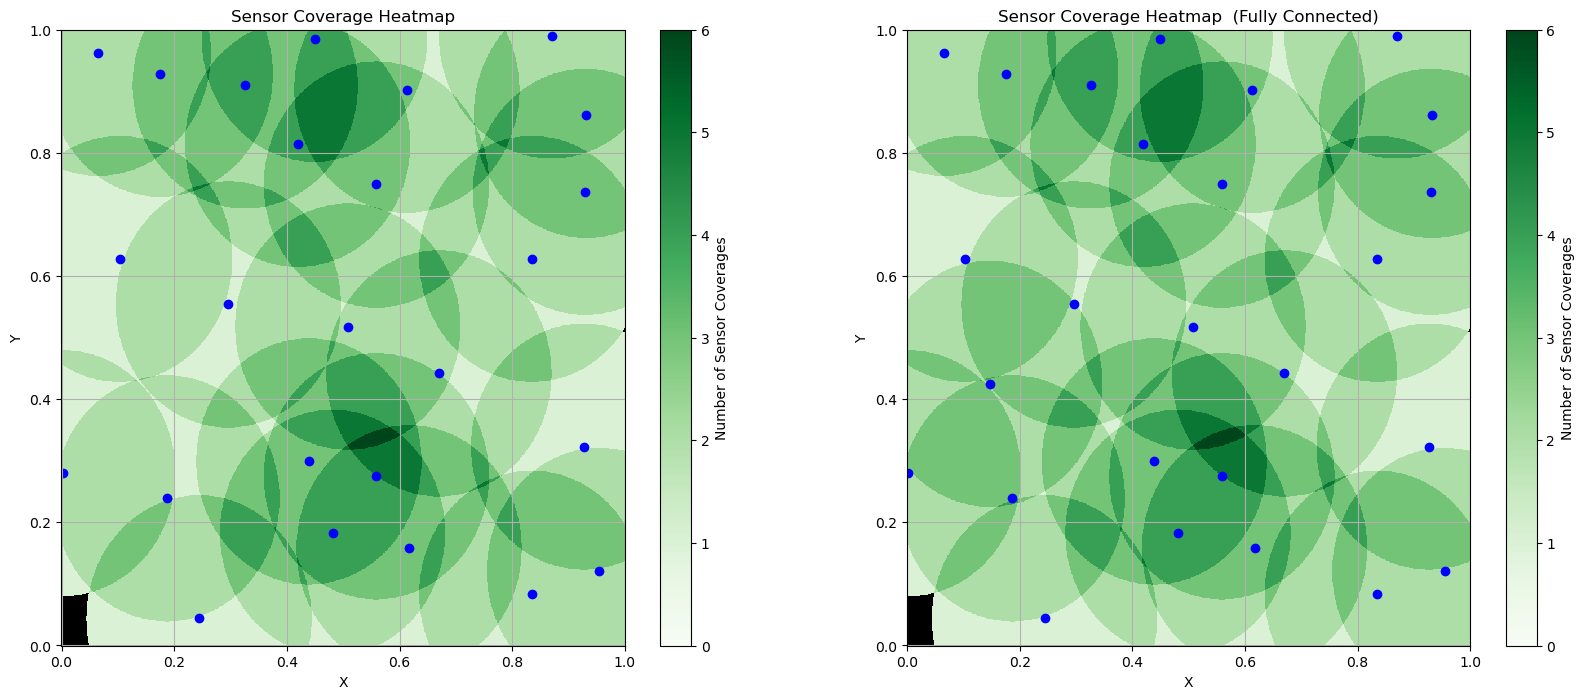

In [20]:
# Read node coordinates from file
with open("nodes.txt", "r") as file:
    lines = file.readlines()

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Parse coordinates
coordinates = []
for line in lines:
    x, y = map(float, line.strip().split(','))
    coordinates.append([x, y])
coordinates = np.array(coordinates)

# Create a grid
grid_size = 1000
x_grid = np.linspace(0, L, grid_size)
y_grid = np.linspace(0, L, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Calculate sensor coverage
sensor_coverage = np.zeros_like(X, dtype=int)
for node in coordinates:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_coverage += (dist_to_node <= Rs)

# Convert areas with 0 sensor coverage to black
sensor_coverage_color = np.where(sensor_coverage == 0, -1, sensor_coverage)

# Plot heatmap
heatmap = axs[0].pcolormesh(X, Y, sensor_coverage_color, cmap='Greens', shading='auto', vmin=0)
axs[0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[0].set_title('Sensor Coverage Heatmap')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
#axs[0].legend()
axs[0].grid(True)

# Explicitly set color for 0 coverage to black
heatmap.cmap.set_under('black')

fig.colorbar(heatmap, ax=axs[0], label='Number of Sensor Coverages')


# Add the new point
new_point = np.array([0.147, 0.42525])
coordinates = np.vstack([coordinates, new_point])

# Calculate sensor coverage
sensor_coverage = np.zeros_like(X, dtype=int)
for node in coordinates:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_coverage += (dist_to_node <= Rs)

# Convert areas with 0 sensor coverage to black
sensor_coverage_color = np.where(sensor_coverage == 0, -1, sensor_coverage)

# Plot heatmap
heatmap = axs[1].pcolormesh(X, Y, sensor_coverage_color, cmap='Greens', shading='auto', vmin=0)
axs[1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[1].set_title('Sensor Coverage Heatmap  (Fully Connected)')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
#axs[0].legend()
axs[1].grid(True)

# Explicitly set color for 0 coverage to black
heatmap.cmap.set_under('black')

fig.colorbar(heatmap, ax=axs[1], label='Number of Sensor Coverages')



plt.show()

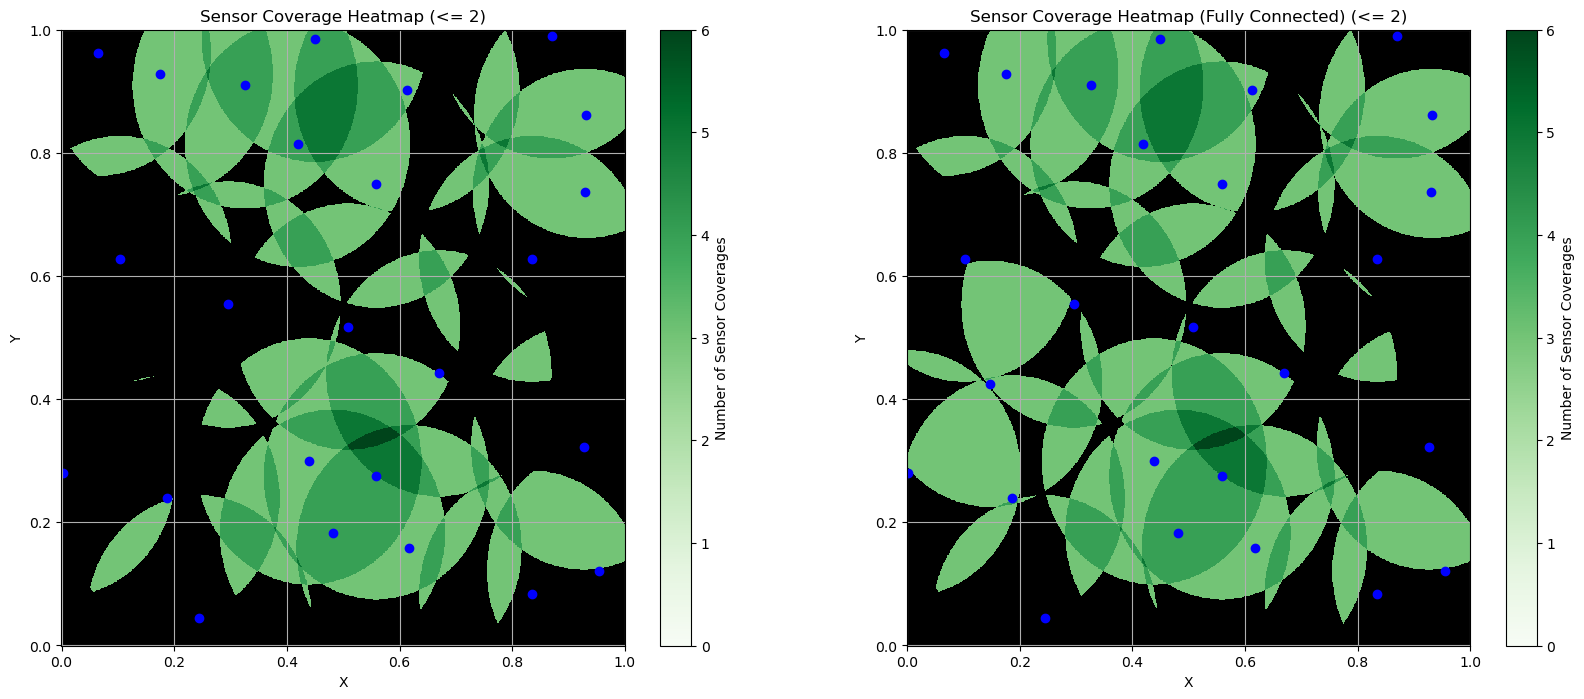

In [21]:
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Parse coordinates
coordinates = []
for line in lines:
    x, y = map(float, line.strip().split(','))
    coordinates.append([x, y])
coordinates = np.array(coordinates)

# Create a grid
grid_size = 1000
x_grid = np.linspace(0, L, grid_size)
y_grid = np.linspace(0, L, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Calculate sensor coverage
sensor_coverage = np.zeros_like(X, dtype=int)
for node in coordinates:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_coverage += (dist_to_node <= Rs)

# Convert areas with 0 sensor coverage to black
sensor_coverage_color = np.where(sensor_coverage <= 2, -1, sensor_coverage)

# Plot heatmap
heatmap = axs[0].pcolormesh(X, Y, sensor_coverage_color, cmap='Greens', shading='auto', vmin=0)
axs[0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[0].set_title('Sensor Coverage Heatmap (<= 2)')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
#axs[0].legend()
axs[0].grid(True)

# Explicitly set color for 0 coverage to black
heatmap.cmap.set_under('black')

fig.colorbar(heatmap, ax=axs[0], label='Number of Sensor Coverages')

# Add the new point
new_point = np.array([0.147, 0.42525])
coordinates = np.vstack([coordinates, new_point])

# Calculate sensor coverage
sensor_coverage = np.zeros_like(X, dtype=int)
for node in coordinates:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_coverage += (dist_to_node <= Rs)

# Convert areas with 0 sensor coverage to black
sensor_coverage_color = np.where(sensor_coverage <= 2, -1, sensor_coverage)

# Plot heatmap
heatmap = axs[1].pcolormesh(X, Y, sensor_coverage_color, cmap='Greens', shading='auto', vmin=0)
axs[1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[1].set_title('Sensor Coverage Heatmap (Fully Connected) (<= 2)')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
#axs[0].legend()
axs[1].grid(True)

# Explicitly set color for 0 coverage to black
heatmap.cmap.set_under('black')

fig.colorbar(heatmap, ax=axs[1], label='Number of Sensor Coverages')



plt.show()

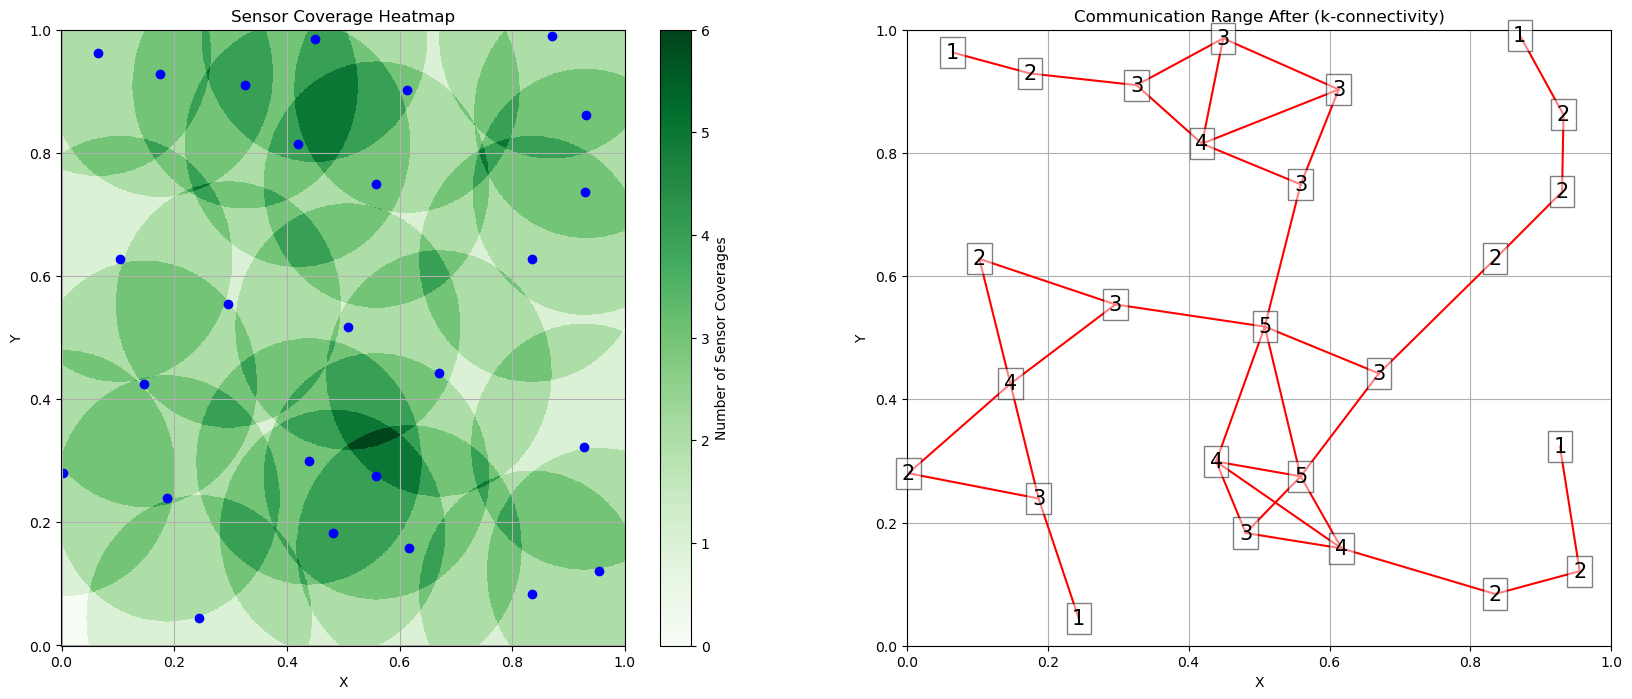

In [22]:
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Create a grid
grid_size = 1000
x_grid = np.linspace(0, L, grid_size)
y_grid = np.linspace(0, L, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Calculate sensor coverage
sensor_coverage = np.zeros_like(X, dtype=int)
for node in coordinates:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_coverage += (dist_to_node <= Rs)

# Plot heatmap
heatmap = axs[0].pcolormesh(X, Y, sensor_coverage, cmap='Greens', shading='auto')
axs[0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[0].set_title('Sensor Coverage Heatmap')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
#axs[0].legend()
axs[0].grid(True)

fig.colorbar(heatmap, ax=axs[0], label='Number of Sensor Coverages')


# Variable for k-connectivity
k_connectivity = np.zeros(len(coordinates), dtype=int)

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[1].plot([coordinates[i, 0], coordinates[j, 0]],
                     [coordinates[i, 1], coordinates[j, 1]],
                     color='red', alpha=1.0)  # Make edges transparent

# Counting k-connectivity
for i in range(len(coordinates)):
    count = 0
    for j in range(len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc and dist != 0 :
            count += 1
    k_connectivity[i] = count

# Plotting the nodes and communication range
axs[1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes', alpha=0.0, s=50)

axs[1].set_title('Communication Range After (k-connectivity)')
axs[1].set_xlim(0.0, 1.0)
axs[1].set_ylim(0.0, 1.0)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].grid(True)

# Displaying k-connectivity information
for i, (x, y) in enumerate(coordinates):
    axs[1].text(x, y, str(k_connectivity[i]), fontsize=15, ha='center', va='center', zorder=5, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

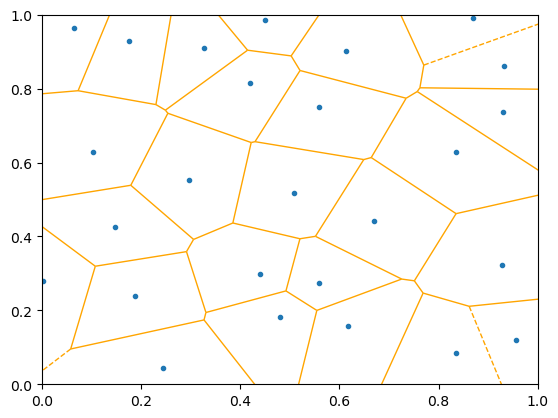

In [23]:
from scipy.spatial import Voronoi , voronoi_plot_2d

vor = Voronoi(coordinates)

# Extracting vertices and edges
vertices = vor.vertices
edges = vor.ridge_vertices

# Plotting Voronoi diagram with vertices and edges
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=1, line_style='dashed')
#plt.plot(vertices[:, 0], vertices[:, 1], 'ko')  # Plotting vertices
#for edge in edges:
#    if all(i >= 0 for i in edge):
#        plt.plot(vertices[edge, 0], vertices[edge, 1], 'b-')  # Plotting edges

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.show()

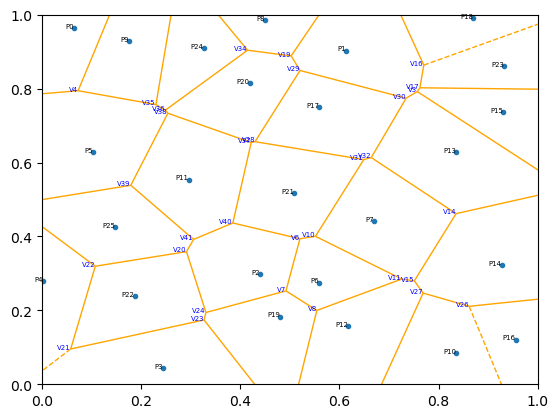

In [24]:
# Extracting vertices and edges
vertices = vor.vertices
edges = vor.ridge_vertices
points = vor.points

# Plotting Voronoi diagram with vertices and edges
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=1, line_style='dashed')

# Annotate points with their coordinates
for idx, (x, y) in enumerate(points):
    plt.text(x, y, f'P{idx}', fontsize=5, ha='right')

# Label vertices with their coordinates
for idx, (x, y) in enumerate(vertices):
    if 0 < x < 1 and 0 < y < 1:
        plt.text(x, y, f'V{idx}', fontsize=5, ha='right', color='blue')

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
# plt.show()
plt.savefig('voronoi_diagram.png', dpi=600)  # 300dpi

In [25]:
def on_segment(p, q, r):
    if (q[0] <= max(p[0], r[0]) and q[0] >= min(p[0], r[0]) and
        q[1] <= max(p[1], r[1]) and q[1] >= min(p[1], r[1])):
        return True
    return False

def orientation(p, q, r):
    val = (float(q[1] - p[1]) * (r[0] - q[0])) - (float(q[0] - p[0]) * (r[1] - q[1]))
    if val > 0:
        return 1 # clockwise
    elif val < 0:
        return 2 # counterclockwise
    else:
        return 0 # colinear

def do_intersect(segment1, segment2):
    p1, q1 = segment1
    p2, q2 = segment2

    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    if (o1 != o2 and o3 != o4):
        return True

    if (o1 == 0 and on_segment(p1, p2, q1)):
        return True

    if (o2 == 0 and on_segment(p1, q2, q1)):
        return True

    if (o3 == 0 and on_segment(p2, p1, q2)):
        return True

    if (o4 == 0 and on_segment(p2, q1, q2)):
        return True

    return False

In [26]:
# Extracting vertices and edges
vertices = vor.vertices
edges = vor.ridge_vertices
points = vor.points
ridge_points = vor.ridge_points
ridge_vertices = vor.ridge_vertices
#print (points)
#print (vertices)
#print (ridge_points)
#print (ridge_vertices)

([0.065 0.963],[0.002 0.28 ])
(-1,0)
Segments do not intersect.
([0.065 0.963],[0.449 0.986])
(-1,5)
Segments intersect.
Segments intersect.
Segments intersect.
Segments intersect.
Segments intersect.
Segments intersect.
Segments do not intersect.
([0.932 0.862],[0.87  0.991])
(-1,16)
Segments intersect.
([0.932 0.862],[0.955 0.121])
(-1,18)
([0.87  0.991],[0.449 0.986])
(-1,2)
Segments intersect.
Segments do not intersect.
Segments intersect.
Segments do not intersect.
Segments do not intersect.
Segments intersect.
Segments intersect.
Segments intersect.
Segments intersect.
Segments do not intersect.
Segments do not intersect.
([0.002 0.28 ],[0.244 0.044])
(-1,21)
Segments intersect.
Segments intersect.
Segments intersect.
Segments intersect.
Segments intersect.
([0.835 0.084],[0.244 0.044])
(-1,25)
([0.835 0.084],[0.955 0.121])
(-1,26)
Segments do not intersect.
Segments do not intersect.
Segments do not intersect.
Segments do not intersect.
Segments intersect.
Segments intersect.
Se

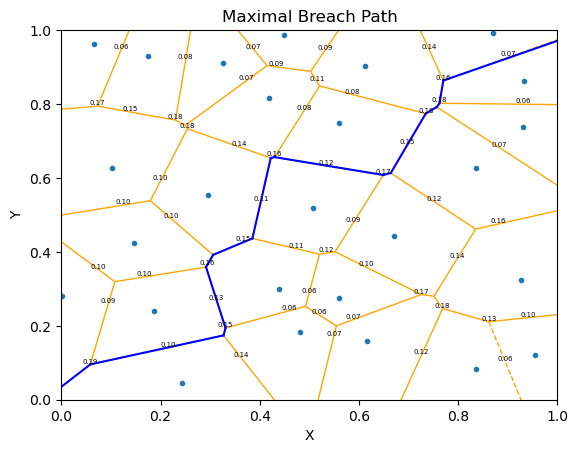

In [27]:
# Plotting Voronoi diagram with vertices and edges
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=1, line_style='dashed')

# Enumerate the ridge_points
for idx, ridge_point in enumerate(ridge_points):
    point_0 = points[ridge_point[0]]
    point_1 = points[ridge_point[1]]
    # using the same idx to get the corresponding ridge_vertice
    ridge_vertice = ridge_vertices[idx]
    vertice_0 = vertices[ridge_vertice[0]]
    vertice_1 = vertices[ridge_vertice[1]]

    if ridge_vertice[0] < 0 or ridge_vertice[1] < 0:
        print("(" + str(point_0) + "," + str(point_1) + ")")
        print("(" + str(ridge_vertice[0]) + "," + str(ridge_vertice[1]) + ")")
        continue


    # Check for intersection
    if do_intersect((point_0, point_1), (vertice_0, vertice_1)):
        print("Segments intersect.")
        distance = np.linalg.norm(point_1 - point_0)/2
        midpoint = (point_0 + point_1) / 2
        plt.text(midpoint[0], midpoint[1], f'{distance:.2f}', ha='center', va='bottom', fontsize=5)

    else:
        print("Segments do not intersect.")
        distance_0 = np.linalg.norm(point_0 - vertice_0)
        distance_1 = np.linalg.norm(point_0 - vertice_1)
        if distance_0 < distance_1:
            if 0 < vertice_0[0] < 1 and 0 < vertice_0[1] < 1:
                plt.text(vertice_0[0], vertice_0[1], f'{distance_0:.2f}', ha='center', va='bottom', fontsize=5)
        else:
            if 0 < vertice_1[0] < 1 and 0 < vertice_1[1] < 1:
                plt.text(vertice_1[0], vertice_1[1], f'{distance_1:.2f}', ha='center', va='bottom', fontsize=5)

# plot the extra number for the dashed lines
point_0 = points[3]
vertice_0 = vertices[21]
distance = np.linalg.norm(point_0 - vertice_0)
plt.text(vertice_0[0], vertice_0[1], f'{distance:.2f}', ha='center', va='bottom', fontsize=5)

point_0 = points[18]
point_1 = points[23]
distance = np.linalg.norm(point_1 - point_0)/2
midpoint = (point_0 + point_1) / 2
plt.text(midpoint[0], midpoint[1], f'{distance:.2f}', ha='center', va='bottom', fontsize=5)

point_0 = points[16]
point_1 = points[10]
distance = np.linalg.norm(point_1 - point_0)/2
midpoint = (point_0 + point_1) / 2
plt.text(midpoint[0], midpoint[1], f'{distance:.2f}', ha='center', va='bottom', fontsize=5)
plt.savefig('voronoi_diagram_with_distance.png', dpi=800)  # 300dpi

# plot the edge
vertice_0 = (0, 0.035)
vertice_1 = vertices[21]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[21]
vertice_1 = vertices[23]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[23]
vertice_1 = vertices[24]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[24]
vertice_1 = vertices[20]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[20]
vertice_1 = vertices[41]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[41]
vertice_1 = vertices[40]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[40]
vertice_1 = vertices[37]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[37]
vertice_1 = vertices[28]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[28]
vertice_1 = vertices[31]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[31]
vertice_1 = vertices[32]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[32]
vertice_1 = vertices[30]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[30]
vertice_1 = vertices[3]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[3]
vertice_1 = vertices[17]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[17]
vertice_1 = vertices[16]
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

vertice_0 = vertices[16]
vertice_1 =(1.0, 0.971)
plt.plot([vertice_0[0], vertice_1[0]], [vertice_0[1], vertice_1[1]], color='blue')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Maximal Breach Path')
plt.xlabel('X')
plt.ylabel('Y')
# plt.show()
plt.savefig('voronoi_diagram_with_path.png', dpi=800)  # 300dpi

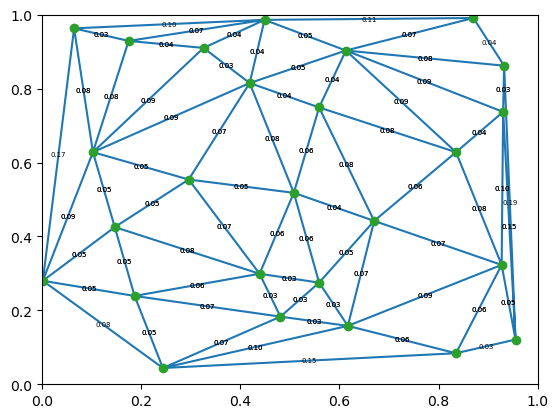

In [28]:
from scipy.spatial import Delaunay

# Creating Delaunay triangulation
tri = Delaunay(coordinates)

# Plotting Delaunay triangulation
plt.triplot(coordinates[:,0], coordinates[:,1], tri.simplices)
plt.plot(coordinates[:,0], coordinates[:,1], 'o')

# Calculate and label the costs
for simplex in tri.simplices:
    # Coordinates of the vertices of the triangle
    x = coordinates[simplex, 0]
    y = coordinates[simplex, 1]
    
    # Calculate midpoints of edges
    midpoints = [(x[i] + x[j]) / 2 for i, j in zip([0, 1, 2], [1, 2, 0])], [(y[i] + y[j]) / 2 for i, j in zip([0, 1, 2], [1, 2, 0])]
    
    # Calculate the distance between each midpoint and the vertices
    distances = [np.sqrt((x[i] - midpoint[0]) ** 2 + (y[i] - midpoint[1]) ** 2) for i, midpoint in zip(range(3), zip(*midpoints))]
    
    # Assign half of the distance as the cost for each edge
    costs = [distance / 2 for distance in distances]
    
    # Label the costs on the plot
    for i, cost in enumerate(costs):
        plt.text(midpoints[0][i], midpoints[1][i], f'{cost:.2f}', ha='center', va='center', fontsize=5)

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.savefig('Delaunay_Triangle_Diagram.png', dpi=800)  # 300dpi

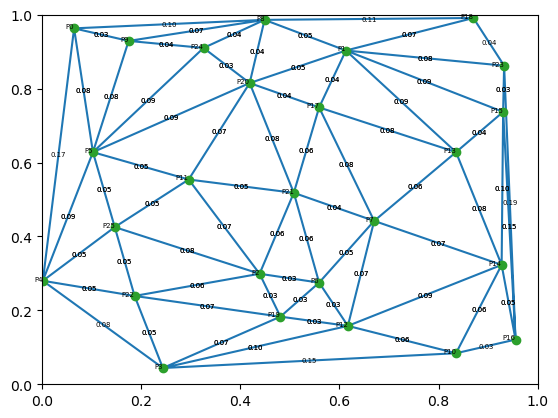

In [29]:
# Creating Delaunay triangulation
tri = Delaunay(coordinates)

# Plotting Delaunay triangulation
plt.triplot(coordinates[:,0], coordinates[:,1], tri.simplices)
plt.plot(coordinates[:,0], coordinates[:,1], 'o')

# Calculate and label the costs
for simplex in tri.simplices:
    # Coordinates of the vertices of the triangle
    x = coordinates[simplex, 0]
    y = coordinates[simplex, 1]
    
    # Calculate midpoints of edges
    midpoints = [(x[i] + x[j]) / 2 for i, j in zip([0, 1, 2], [1, 2, 0])], [(y[i] + y[j]) / 2 for i, j in zip([0, 1, 2], [1, 2, 0])]
    
    # Calculate the distance between each midpoint and the vertices
    distances = [np.sqrt((x[i] - midpoint[0]) ** 2 + (y[i] - midpoint[1]) ** 2) for i, midpoint in zip(range(3), zip(*midpoints))]
    
    # Assign half of the distance as the cost for each edge
    costs = [distance / 2 for distance in distances]
    
    # Label the costs on the plot
    for i, cost in enumerate(costs):
        plt.text(midpoints[0][i], midpoints[1][i], f'{cost:.2f}', ha='center', va='center', fontsize=5)

# Annotate points with their coordinates
for idx, (x, y) in enumerate(coordinates):
    plt.text(x, y, f'P{idx}', fontsize=5, ha='right')

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.savefig('Delaunay_Triangle_Diagram_with_ID.png', dpi=800)  # 300dpi

In [30]:
# Find the point closest to (0, 0)
closest_to_origin_idx = np.argmin(np.sum(coordinates ** 2, axis=1))

# Find the point closest to (L, L)
closest_to_limit_idx = np.argmin(np.sum((coordinates - 1.0) ** 2, axis=1))

# Print the results
print(f"Point closest to (0, 0): P{closest_to_origin_idx}")
print(f"Point closest to (L, L): P{closest_to_limit_idx}")

Point closest to (0, 0): P3
Point closest to (L, L): P18


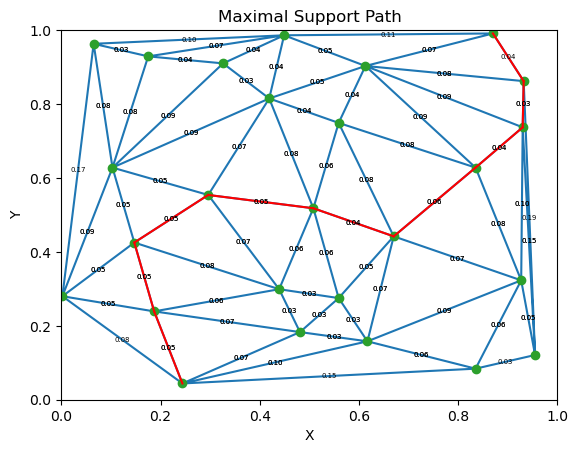

In [37]:
# Creating Delaunay triangulation
tri = Delaunay(coordinates)

# Plotting Delaunay triangulation
plt.triplot(coordinates[:,0], coordinates[:,1], tri.simplices)
plt.plot(coordinates[:,0], coordinates[:,1], 'o')

# Calculate and label the costs
for simplex in tri.simplices:
    # Coordinates of the vertices of the triangle
    x = coordinates[simplex, 0]
    y = coordinates[simplex, 1]
    
    # Calculate midpoints of edges
    midpoints = [(x[i] + x[j]) / 2 for i, j in zip([0, 1, 2], [1, 2, 0])], [(y[i] + y[j]) / 2 for i, j in zip([0, 1, 2], [1, 2, 0])]
    
    # Calculate the distance between each midpoint and the vertices
    distances = [np.sqrt((x[i] - midpoint[0]) ** 2 + (y[i] - midpoint[1]) ** 2) for i, midpoint in zip(range(3), zip(*midpoints))]
    
    # Assign half of the distance as the cost for each edge
    costs = [distance / 2 for distance in distances]
    
    # Label the costs on the plot
    for i, cost in enumerate(costs):
        plt.text(midpoints[0][i], midpoints[1][i], f'{cost:.2f}', ha='center', va='center', fontsize=5)

# plot the edge
point_0 = points[3]
point_1 = points[22]
plt.plot([point_0[0], point_1[0]], [point_0[1], point_1[1]], color='red')

# plot the edge
point_0 = points[22]
point_1 = points[25]
plt.plot([point_0[0], point_1[0]], [point_0[1], point_1[1]], color='red')

# plot the edge
point_0 = points[25]
point_1 = points[11]
plt.plot([point_0[0], point_1[0]], [point_0[1], point_1[1]], color='red')

# plot the edge
point_0 = points[11]
point_1 = points[21]
plt.plot([point_0[0], point_1[0]], [point_0[1], point_1[1]], color='red')

# plot the edge
point_0 = points[21]
point_1 = points[7]
plt.plot([point_0[0], point_1[0]], [point_0[1], point_1[1]], color='red')

# plot the edge
point_0 = points[7]
point_1 = points[13]
plt.plot([point_0[0], point_1[0]], [point_0[1], point_1[1]], color='red')

# plot the edge
point_0 = points[13]
point_1 = points[15]
plt.plot([point_0[0], point_1[0]], [point_0[1], point_1[1]], color='red')

# plot the edge
point_0 = points[15]
point_1 = points[23]
plt.plot([point_0[0], point_1[0]], [point_0[1], point_1[1]], color='red')

# plot the edge
point_0 = points[23]
point_1 = points[18]
plt.plot([point_0[0], point_1[0]], [point_0[1], point_1[1]], color='red')


plt.title('Maximal Support Path')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.savefig('Delaunay_Triangle_Diagram_with_Maximal_Support_Path.png', dpi=800)  # 300dpi